# Limitation of Polynomial Interpolation

The below code illustrates the limitation of the polynomial interpolation.
 • Oscillation of the interpolant when using many points
 • Error in extrapolation

In [46]:
import numpy as np
import matplotlib.pyplot as plt

In [47]:
def lagrange(xData,yData,x):
    '''Lagrange Interpolation
    Parameters:
        xData, yData: Data points
        x: Interpolating point
    Return:
        interpolant: An array of y values of interpolant evaluated at x '''

    N = len(xData)
    interpolant = 0
    for i in range(0,N):  #0 to N-1
        p = 1 #lagrange polynomial L(x)
        for j in range(0,N):
            if (j!=i):
                p = p*((x-xData[j])/(xData[i]-xData[j]))
        interpolant += p*yData[i]
    return interpolant

In [48]:
def NewtonFD(xData,yData,x):
    '''Newton's Forward Difference Interpolation
       Parameters:
           xData, yData: Data points
           x: Interpolating point
       Return:
           interpolant: An array of y values of interpolant evaluated at x '''

    N = len(xData)
    p = 1
    h = xData[1]-xData[0]
    u = (x-xData[0])/h
    sum = yData[0]
    f = np.zeros((N,N))

    for j in range(0,N):
        f[0][j] = yData[j]
    for i in range(1,N):
        for j in range(0,N-i):
            f[i][j]=f[i-1][j+1]-f[i-1][j]
    for i in range(1,N):
        p = p*((u-i+1)/i)
        sum = sum + p*f[i][0]

    return sum

Example run: Polynomial interpolant resulting in oscillation

In [49]:
def f(x):
    return 1/(1+x**2)

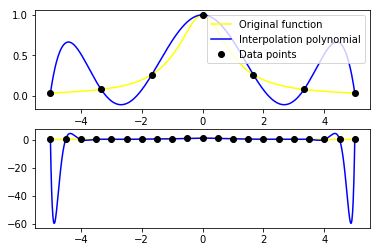

In [50]:
xData = np.linspace(-5,5,7)
yData = f(xData)

xInter = np.linspace(xData[0],xData[-1],1000)
yInter = NewtonFD(xData,yData,xInter)

xNew = xInter
yNew = f(xInter)

plt.figure(1)
ax1 = plt.subplot(211)
#plot original function
plt.plot(xNew,yNew,'yellow',label='Original function')
#plot interpolation fuction
plt.plot(xInter,yInter,'blue', label='Interpolation polynomial')
#plot data points
plt.plot(xData,yData,'ko',label='Data points')
plt.legend()

plt.subplot(212)
xData = np.linspace(-5,5,21)
# xInter = np.linspace(xData[0]-1,xData[-1]+1,1000)
yData = f(xData)

yInter = lagrange(xData,yData,xInter)

#plot original function
plt.plot(xNew,yNew,'yellow')
#plot interpolation fuction
plt.plot(xInter,yInter,'blue', label='Interpolation polynomial')
#plot data points
plt.plot(xData,yData,'ko')
plt.show()

Example run: large error in extrapolation

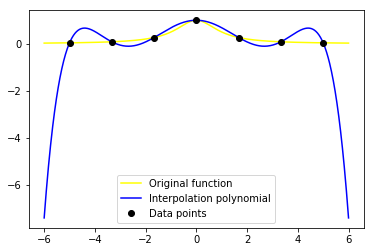

In [51]:
xData = np.linspace(-5,5,7)
yData = f(xData)

xInter = np.linspace(xData[0]-1,xData[-1]+1,1000)
yInter = NewtonFD(xData,yData,xInter)

xNew = xInter
yNew = f(xInter)

#plot original function
plt.plot(xNew,yNew,'yellow',label='Original function')
#plot interpolation fuction
plt.plot(xInter,yInter,'blue', label='Interpolation polynomial')
#plot data points
plt.plot(xData,yData,'ko',label='Data points')
plt.legend()